In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading data into ipl
Dev = pd.read_csv('deliveries.csv')

In [258]:
Dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [259]:
Dev.shape

(260920, 17)

In [260]:
Dev.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [261]:
Dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [262]:
Dev.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# 1.Top 5 Batsmen by Runs


In [263]:
Tbr=Dev.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(5)
Tbr

batter
V Kohli      8014
S Dhawan     6769
RG Sharma    6630
DA Warner    6567
SK Raina     5536
Name: batsman_runs, dtype: int64

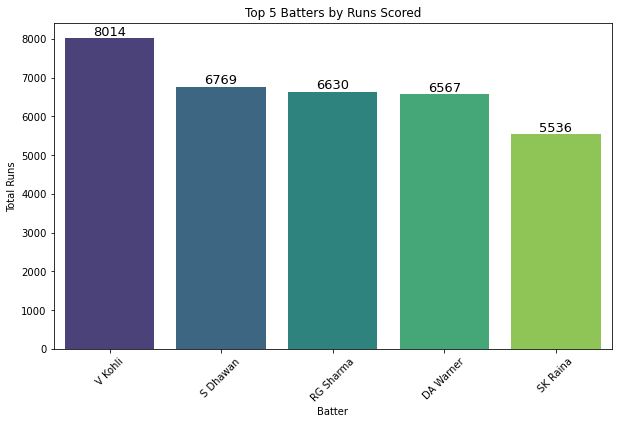

In [264]:
# Plotting the top 5 batters
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=Tbr.index, y=Tbr.values, palette="viridis")

# Adding the score above each bar
for bar in ax.patches:  
    ax.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center',  
        va='bottom', 
        fontsize=13  
    )


plt.title("Top 5 Batters by Runs Scored")
plt.xlabel("Batter")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.show()


# 2.Top Bowlers by Wickets

In [265]:
tbw=Dev.groupby("bowler")["is_wicket"].sum().sort_values(ascending=False).head(5)
tbw

bowler
YS Chahal    213
DJ Bravo     207
PP Chawla    201
SP Narine    200
R Ashwin     198
Name: is_wicket, dtype: int64

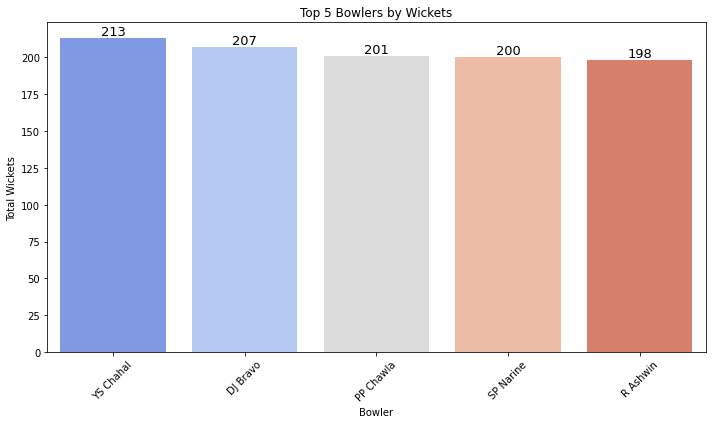

In [266]:
# Plotting the top 5 bowlers
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tbw.index, y=tbw.values, palette="coolwarm")

# Adding the wickets above each bar
for bar in ax.patches:
    ax.annotate(
        int(bar.get_height()),  
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', 
        va='bottom', 
        fontsize=13 
    )

plt.title("Top 5 Bowlers by Wickets")
plt.xlabel("Bowler")
plt.ylabel("Total Wickets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Run Distribution by Over

In [267]:
Rdo=Dev.groupby("over")["total_runs"].sum()
Rdo

over
0     13651
1     16163
2     17895
3     18415
4     18565
5     18528
6     14839
7     15981
8     16639
9     16353
10    16779
11    17076
12    17205
13    17634
14    18149
15    18472
16    19012
17    19559
18    19076
19    17765
Name: total_runs, dtype: int64

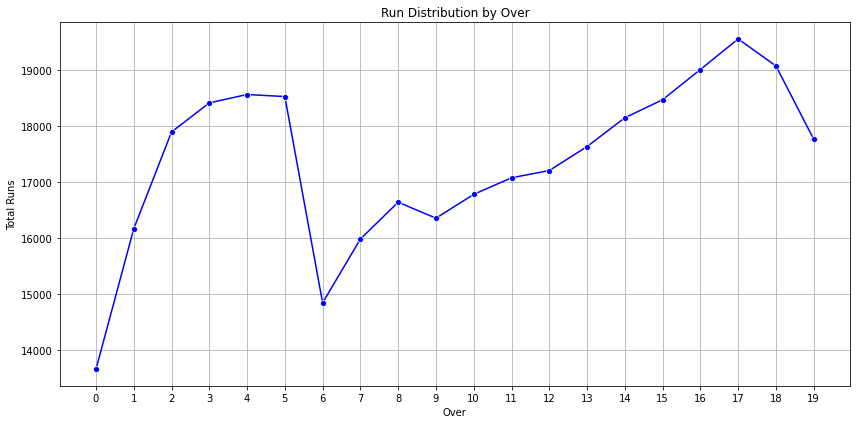

In [268]:
# Plotting the run distribution by over
plt.figure(figsize=(12, 6))
sns.lineplot(x=Rdo.index, y=Rdo.values, marker='o', color='blue')

# Adding labels and title
plt.title("Run Distribution by Over")
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.xticks(range(0, max(Rdo.index) + 1))  
plt.grid()
plt.tight_layout()
plt.show()


# 4. Extras Breakdown

In [269]:
Eb=Dev.groupby(["extras_type"])["extras_type"].count()
Eb

extras_type
byes        673
legbyes    4001
noballs    1069
penalty       2
wides      8380
Name: extras_type, dtype: int64

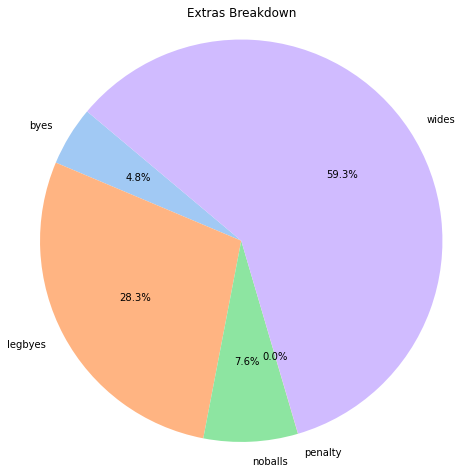

In [270]:
# Group by 'extras_type' and count occurrences
Eb = Dev.groupby("extras_type")["extras_type"].count()

# Define an attractive color palette
colors = sns.color_palette("Set2", len(Eb))
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(Eb, labels=Eb.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(Eb)))

plt.title("Extras Breakdown")
plt.axis('equal')  
plt.show()

# 5. Dismissal Types

In [271]:
Ds=Dev['dismissal_kind'].value_counts()
Ds

caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: dismissal_kind, dtype: int64

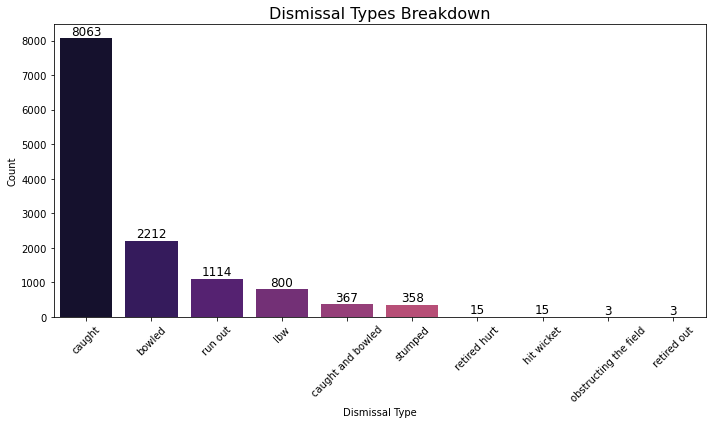

In [272]:
# Plotting the dismissal types as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=Ds.index, y=Ds.values, palette="magma")

# Adding the count above each bar
for bar in ax.patches:
    ax.annotate(
        int(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.title("Dismissal Types Breakdown", fontsize=16)
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Average run rate per over

In [273]:
runs_per_over = Dev.groupby('over')['total_runs'].mean().reset_index()
runs_per_over.columns = ['over', 'average_runs']  
runs_per_over



,over,average_runs
0,0,0.981663
1,1,1.173528
2,2,1.316099
3,3,1.356538
4,4,1.369100
5,5,1.373055
6,6,1.103107
7,7,1.189948
8,8,1.242087
9,9,1.224577


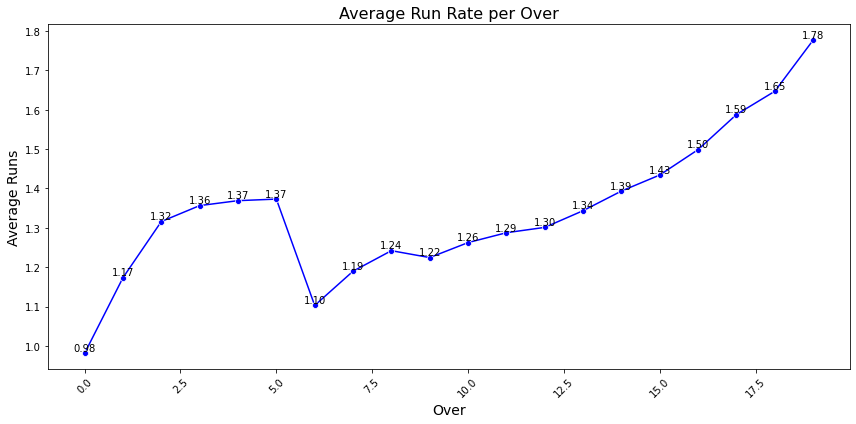

In [287]:
# Plotting the average runs per over as a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='over', y='average_runs', data=runs_per_over, marker='o', color='blue')

# Adding text labels at each point
for i in range(len(runs_per_over)):
    plt.text(
        runs_per_over['over'][i],
        runs_per_over['average_runs'][i],
        f"{runs_per_over['average_runs'][i]:.2f}", 
        horizontalalignment='center',
        verticalalignment='bottom'
    )

plt.title("Average Run Rate per Over", fontsize=16)
plt.xlabel("Over", fontsize=14)
plt.ylabel("Average Runs", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 7. wicket fall distribution by over

In [288]:
wickets_by_over = Dev[Dev['is_wicket'] == 1].groupby('over')['is_wicket'].count().reset_index()
wickets_by_over

,over,is_wicket
0,0,463
1,1,503
2,2,533
3,3,548
4,4,576
5,5,540
6,6,444
7,7,472
8,8,537
9,9,498


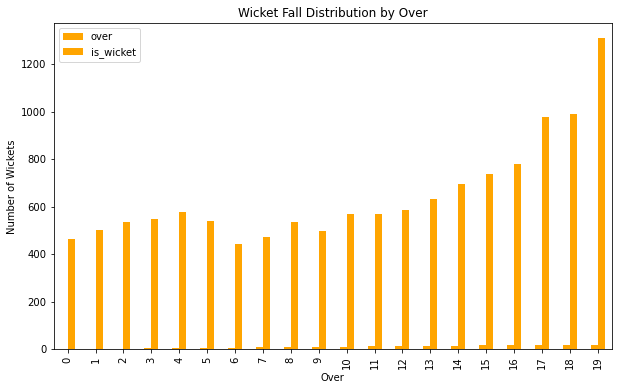

In [289]:
# Plotting the wicket fall distribution by over
wickets_by_over.plot(kind='bar', figsize=(10,6), color='orange')

# Add labels and title
plt.title('Wicket Fall Distribution by Over')
plt.xlabel('Over')
plt.ylabel('Number of Wickets')

# Display the plot
plt.show()

# 8. Team Performance Analysis

In [291]:
team_run=Dev.groupby(['batting_team'])['total_runs'].sum()
team_runs=team_run.sort_values(ascending=False)
team_runs

batting_team
Mumbai Indians                 42176
Kolkata Knight Riders          39331
Chennai Super Kings            38629
Royal Challengers Bangalore    37692
Rajasthan Royals               34747
Kings XI Punjab                30064
Sunrisers Hyderabad            29071
Delhi Daredevils               24296
Delhi Capitals                 14900
Deccan Chargers                11463
Punjab Kings                    9536
Gujarat Titans                  7757
Lucknow Super Giants            7510
Pune Warriors                   6358
Gujarat Lions                   4862
Royal Challengers Bengaluru     2930
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Kochi Tuskers Kerala            1901
Name: total_runs, dtype: int64

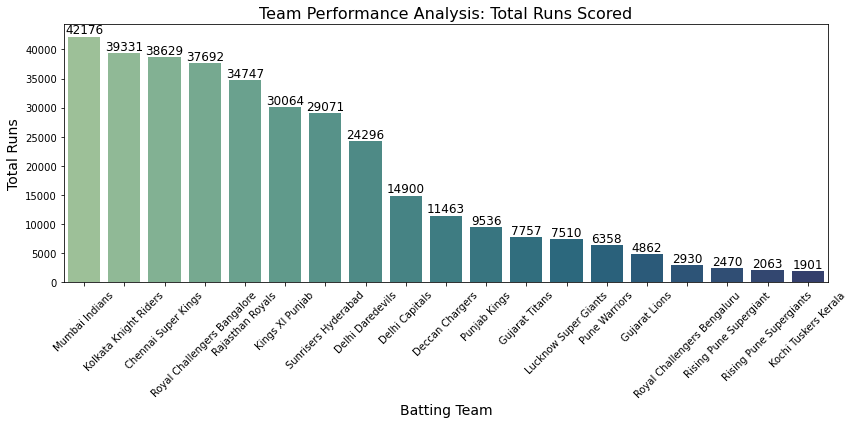

In [292]:
# Plotting the team performance as a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=team_runs.index, y=team_runs.values, palette="crest")

# Adding the total runs above each bar
for bar in ax.patches:
    ax.annotate(
        int(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.title("Team Performance Analysis: Total Runs Scored", fontsize=16)
plt.xlabel("Batting Team", fontsize=14)
plt.ylabel("Total Runs", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()